In [ ]:
from symbolic_bounds import ProgramFactory
from symbolic_bounds.dag import DAG

# Test with simple DAG: X -> Y
print("="*80)
print("SIMPLE EXAMPLE: X -> Y")
print("="*80)

# Create a DAG
dag = DAG()

# Add binary nodes - all nodes must be assigned to a partition
X = dag.add_node('X', support={0, 1}, partition='L')
Y = dag.add_node('Y', support={0, 1}, partition='R')
dag.add_edge(X, Y)

dag.generate_all_response_types()
dag.print_response_type_table(X)
dag.print_response_type_table(Y)

constraints2 = ProgramFactory.write_constraints(dag)
constraints2.print_constraints(show_matrices=False, explicit_equations=True)


# First, get the constraints to see dimension of q
constraints = ProgramFactory.write_constraints(dag)
print(f"\nDimension of decision variable q: ℵᴿ = {len(constraints2.response_type_labels)}")
print(f"Response type combinations r_γ for γ ∈ {{1, ..., {len(constraints2.response_type_labels)}}}:")
for i, label in enumerate(constraints2.response_type_labels):
    print(f"  γ={i}: {label}")

# Construct objective function for P(Y=1 | do(X=1))
print("\n" + "-"*80)
print("Query: P(Y=1 | do(X=1))")
print("-"*80)
alpha = ProgramFactory.writeRung2(dag, {dag.get_node('Y')}, {dag.get_node('X')}, (1,), (1,))

print(f"\nObjective function vector α:")
print(f"  Dimension: {len(alpha)} (same as dim(q) = ℵᴿ = {len(constraints2.response_type_labels)})")
print(f"  ✓ Dimensions match: dim(α) = dim(q)")

print(f"\nα vector values:")
for i, val in enumerate(alpha):
    marker = "★" if val > 0 else " "
    print(f"  α[{i}] = {val:.0f}  {marker}  ({constraints2.response_type_labels[i]})")

print(f"\nInterpretation:")
print(f"  α^T q = P(Y=1 | do(X=1))")
print(f"  Non-zero entries ({sum(alpha > 0)} out of {len(alpha)}): response types that produce Y=1 when X=1")
print(f"  Under intervention do(X=1), we:")
print(f"    1. Override X to value 1 (ignore response type for X)")
print(f"    2. Use response types for Y to determine its value")
print(f"    3. Check if Y=1 results")


SIMPLE EXAMPLE: X -> Y

Response types for X (no parents):
r_X^1: X = 0
r_X^2: X = 1


Response types for Y (parents: X):
=====

r_Y^1:
X | Y
-----
0 | 0
1 | 0

r_Y^2:
X | Y
-----
0 | 0
1 | 1

r_Y^3:
X | Y
-----
0 | 1
1 | 0

r_Y^4:
X | Y
-----
0 | 1
1 | 1

CONSTRAINT SYSTEM FROM ALGORITHM 1

                             Algorithm 1 Variables                              
--------------------------------------------------------------------------------
  ℵᴿ (aleph_R):      4  (number of response type combinations)
  B           :      4  (number of (W_L, W_R) configurations)
  dim(q)      :      4  (decision variable has 4 components)
  dim(p*)     :      4  (joint probability vector)
  |W_L configs|:      2  (number of distinct W_L configurations)
  dim(p|W_L)  :      2  (conditional prob. vector per W_L config)

                               Matrix Dimensions                                
--------------------------------------------------------------------------------
  P matrix    

In [52]:
print(constraints1.P)

[[1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
DAG Summary:
  Total nodes: 5
  W_L nodes (3): L0, L1, L2
  W_R nodes (2): R0, R1
  Edges (3):
    L1 -> L2
    L2 -> R0
    R0 -> R1


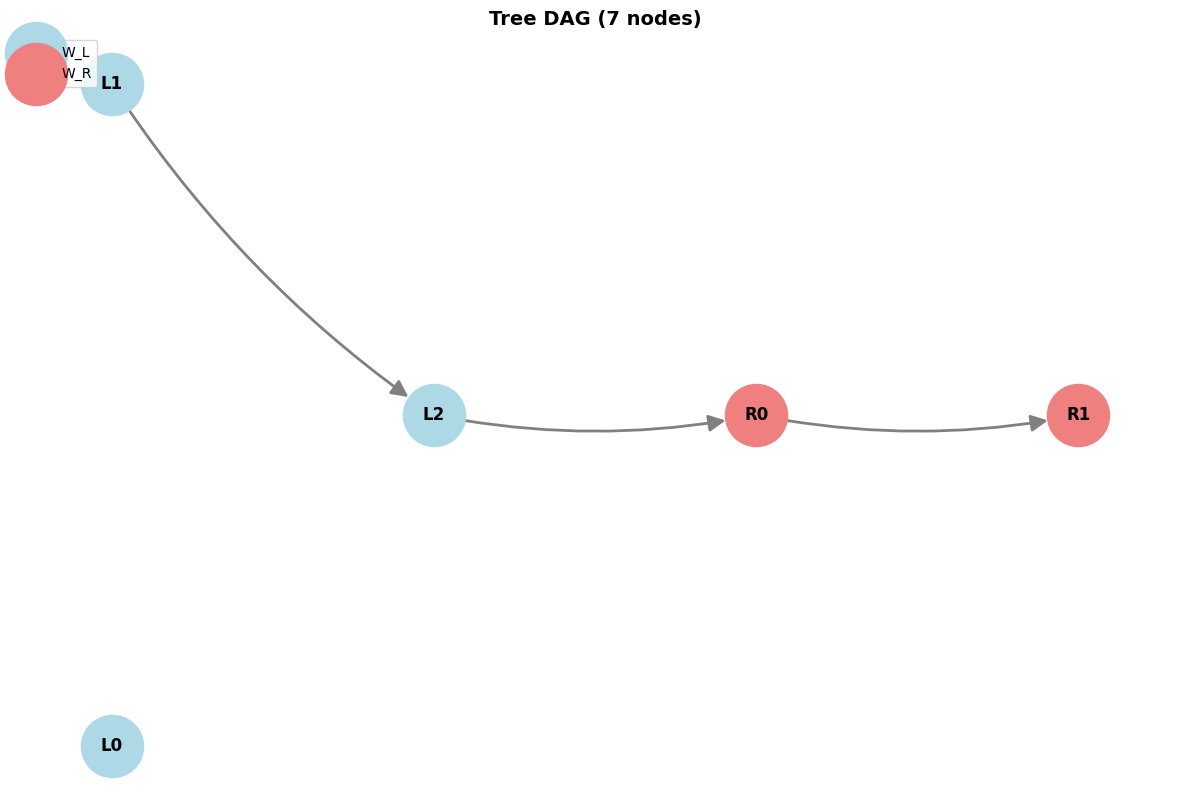

VALIDATING CONSTRAINTS FOR DAG
Nodes in W_L: L0, L1, L2
Nodes in W_R: R0, R1
Edges: L1->L2, L2->R0, R0->R1

GENERATED CONSTRAINTS
CONSTRAINT SYSTEM FROM ALGORITHM 1

                             Algorithm 1 Variables                              
--------------------------------------------------------------------------------
  ℵᴿ (aleph_R):     16  (number of response type combinations)
  B           :     32  (number of (W_L, W_R) configurations)
  dim(q)      :     16  (decision variable has 16 components)
  dim(p*)     :     32  (joint probability vector)
  |W_L configs|:      8  (number of distinct W_L configurations)
  dim(p|W_L)  :      4  (conditional prob. vector per W_L config)

                               Matrix Dimensions                                
--------------------------------------------------------------------------------
  P matrix    :   32 × 16    (Algorithm 1: P matrix)
  P* matrix   :   32 × 16    (Algorithm 1: P* matrix with p{W_L} weights)
  Λ matrix   

True

In [97]:
from symbolic_bounds.dag import DAG
%load_ext autoreload
%autoreload 2
from symbolic_bounds.test_constraints import validate_constraints


from symbolic_bounds.random_dag_generator import (
    generate_random_partitioned_dag, 
    generate_random_chain_dag,
    generate_random_tree_dag,
    print_dag_summary
)
import matplotlib.pyplot as plt



tree_dag = generate_random_partitioned_dag(n=5)
print_dag_summary(tree_dag)
fig3 = tree_dag.draw(figsize=(12, 8), title="Tree DAG (7 nodes)")
plt.show()

validate_constraints(tree_dag, verbose=True)
